<a href="https://colab.research.google.com/github/RonakMehta21/Machine-Learning/blob/master/Topic_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic Modeling with LDA and Gensim

This notebook demonstrates how to perform topic modeling with Latent Dirichlet Allocation (LDA) and classify a label to a new topic by using TF-IDF and cosine similarity with the help of gensim and nltk library.

The articles used for this demonstration purpose were randomly chosen to perform topic modeling. These articles can be accessible at:

[What’s The Stock Market Seeing That We’re Not?](https://medium.com/swlh/whats-the-stock-market-seeing-that-we-re-not-bb4a03b223c5)

[Comparing storytelling in games & literature](https://medium.com/@Tarnimus/comparing-storytelling-in-games-literature-4e5ff6ca5a73)

[What It’s Like To Be A Movie Producer](https://medium.com/@overnightrick/what-its-like-to-be-a-movie-producer-edca96967123)

The text was extracted from these articles and stored in a text file.

In [0]:
# Read text file into colaboratory
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

The generated text file is accessible at this [link](https://drive.google.com/open?id=1PuzBrkOrlKTgaVcl_1nHvmRIDpf3hOij)

In [70]:
# Google drive link where the dataset is stored.
link = 'https://drive.google.com/open?id=1PuzBrkOrlKTgaVcl_1nHvmRIDpf3hOij'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1PuzBrkOrlKTgaVcl_1nHvmRIDpf3hOij


In [0]:
# Download the text file.
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('data.txt')

In [0]:
# Import necessary libraries
import pandas as pd
import numpy as np

In [0]:
# Convert to CSV file
import pandas as pd
df = pd.read_fwf('data.txt')
df.to_csv('data.csv')

In [0]:
# Read the CSV file
data = pd.read_csv('data.csv',header=None)

In [0]:
data['text'] = data[1]

In [0]:
# Load the regular expression library
import re

### Data Preprocessing 

In [78]:
# Remove punctuations
data['text'] = data['text'].map(lambda x: re.sub('[,\.!?]', '', x))

<input>:1: DeprecationWarning: invalid escape sequence \.
<input>:1: DeprecationWarning: invalid escape sequence \.
<input>:1: DeprecationWarning: invalid escape sequence \.
<ipython-input-78-2990a2999eec>:1: DeprecationWarning: invalid escape sequence \.
  data['text'] = data['text'].map(lambda x: re.sub('[,\.!?]', '', x))


In [79]:
data['text']

0          What’s The Stock Market Seeing That We’re Not
1      As Americans brace for a week of horror the st...
2                  We don’t think it’s that complicated:
3                       There’s a lot of money out there
4      The government is pumping trillions of dollars...
                             ...                        
170    Help me it pleads get me to the screen where I...
171    Then there are the other voices: Heed the sign...
172    And still I carry on for some unknown reason P...
173    For these are the tools of my trade I’m a prod...
174             This post originally appeared on Journal
Name: text, Length: 175, dtype: object

In [81]:
data['text'][1]

'As Americans brace for a week of horror the stock market is having a very good run so far Why'

In [0]:
# Convert the titles to lowercase
data['text'] = data['text'].map(lambda x: x.lower())

In [83]:
# Print out the first rows of text
data['text'].head()

0        what’s the stock market seeing that we’re not
1    as americans brace for a week of horror the st...
2                we don’t think it’s that complicated:
3                     there’s a lot of money out there
4    the government is pumping trillions of dollars...
Name: text, dtype: object

### Convert the collection of text to a matrix of token counts using CountVectorizer

In [0]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

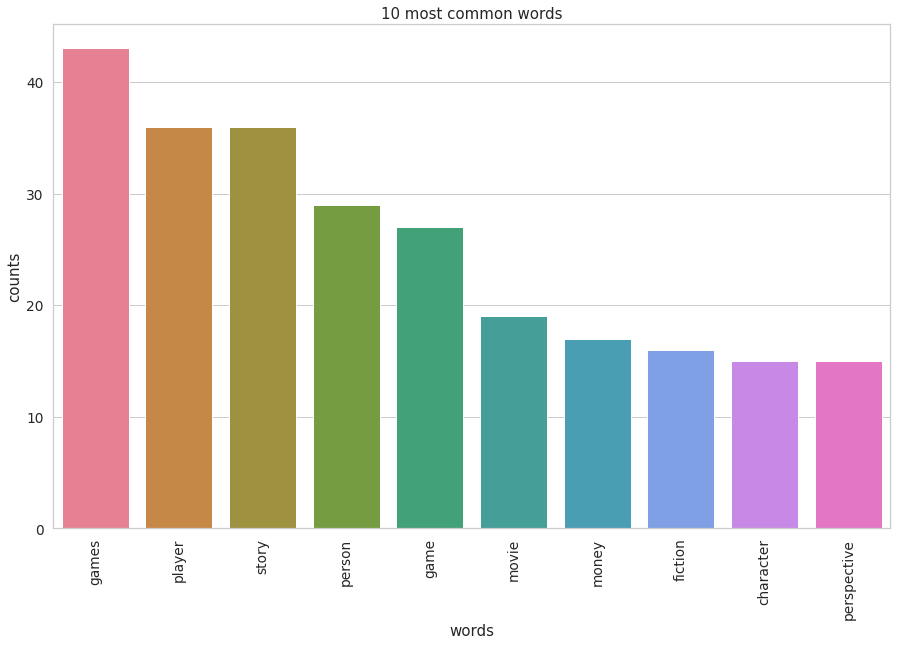

In [86]:
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(data['text'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

### Perform LDA to give “topics” that occur in the articles mentioned above that best represents the information in them.

In [91]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
l = []
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        l.append(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 10
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
games money person fiction like going zero crime perspective game

Topic #1:
story player game money action way lot games reader mechanical

Topic #2:
games person game comedy book story gaming genres storytelling player

Topic #3:
story player want don little read narrative director forms exciting

Topic #4:
games time getting script end investors form way close say

Topic #5:
story player character person games game perspective players entirely storytelling

Topic #6:
movie games genre thematic person does good able star mechanical

Topic #7:
people genre mechanical script critical movie narrative point actor audience

Topic #8:
movies movie million people years banks making does institutions financial

Topic #9:
trump just look want really player big market sure writer


### Given a new topic and to classify the topic with a label, the generated topics from LDA were manually labeled and was converted into a CSV file.

In [0]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [109]:
# Google drive link where the dataset is stored.
link = 'https://drive.google.com/open?id=14WPNDWDkw_Ry8GPdVuyirtb9Is70l2uh'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

14WPNDWDkw_Ry8GPdVuyirtb9Is70l2uh


The generated CSV file is accessible at this [link](https://drive.google.com/open?id=14WPNDWDkw_Ry8GPdVuyirtb9Is70l2uh)

In [0]:
# Download the twitter dataset.
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('MNBdatatset.csv')

In [0]:
# Read the CSV file
df = pd.read_csv('MNBdatatset.csv')

In [112]:
df

,Label,Word1,Word2,Word3,Word4,Word5,Word6,Word7,Word8,Word9,Word10
0,fiction script,person,perspective,story,player,fiction,games,character,intent,change,script
1,crime story,player,games,story,crime,storytelling,fiction,like,actor,think,mechanical
2,game,games,player,person,end,getting,character,mechanics,investors,game,reader
3,comedy movie,games,player,comedy,don,action,movies,audience,years,good,movie
4,Finance,money,story,going,life,want,banks,new,zero,free,places
5,Mortgage game,games,genre,person,game,able,mortgage,character,does,just,going
6,Big movie,movie,read,book,reason,money,producer,big,people,wasn,just
7,romance movie,person,games,game,genres,narrative,movies,storytelling,11,romance,shooter
8,Player,movie,player,like,little,point,look,esther,dear,especially,story
9,third person game,game,games,player,fiction,players,literary,based,talk,really,gaming


In [113]:
# Import the necessary libraries
!pip install nltk
!pip install gensim
import nltk
import gensim
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
df['LDA_Words']=df.Word1 + ' ' + df.Word2 +' ' + df.Word3 +' ' + df.Word4 +' ' + df.Word5 +' ' + df.Word6 +' ' + df.Word7 +' ' + df.Word8 +' ' + df.Word9 +' ' + df.Word10

In [115]:
df

,Label,Word1,Word2,Word3,Word4,Word5,Word6,Word7,Word8,Word9,Word10,LDA_Words
0,fiction script,person,perspective,story,player,fiction,games,character,intent,change,script,person perspective story player fiction games ...
1,crime story,player,games,story,crime,storytelling,fiction,like,actor,think,mechanical,player games story crime storytelling fiction ...
2,game,games,player,person,end,getting,character,mechanics,investors,game,reader,games player person end getting character mech...
3,comedy movie,games,player,comedy,don,action,movies,audience,years,good,movie,games player comedy don action movies audience...
4,Finance,money,story,going,life,want,banks,new,zero,free,places,money story going life want banks new zero fre...
5,Mortgage game,games,genre,person,game,able,mortgage,character,does,just,going,games genre person game able mortgage characte...
6,Big movie,movie,read,book,reason,money,producer,big,people,wasn,just,movie read book reason money producer big peop...
7,romance movie,person,games,game,genres,narrative,movies,storytelling,11,romance,shooter,person games game genres narrative movies stor...
8,Player,movie,player,like,little,point,look,esther,dear,especially,story,movie player like little point look esther dea...
9,third person game,game,games,player,fiction,players,literary,based,talk,really,gaming,game games player fiction players literary bas...


In [0]:
df=df[['Label','LDA_Words']]

In [117]:
df

,Label,LDA_Words
0,fiction script,person perspective story player fiction games ...
1,crime story,player games story crime storytelling fiction ...
2,game,games player person end getting character mech...
3,comedy movie,games player comedy don action movies audience...
4,Finance,money story going life want banks new zero fre...
5,Mortgage game,games genre person game able mortgage characte...
6,Big movie,movie read book reason money producer big peop...
7,romance movie,person games game genres narrative movies stor...
8,Player,movie player like little point look esther dea...
9,third person game,game games player fiction players literary bas...


### Obtain the label for a new topic with the help of cosine similarity.

In [0]:
# Tokenize the copy of text with nltk.tokenize
from nltk.tokenize import word_tokenize, sent_tokenize
gen_docs = [[w.lower() for w in word_tokenize(text)] for text in df.LDA_Words]

In [119]:
gen_docs

[['person',
  'perspective',
  'story',
  'player',
  'fiction',
  'games',
  'character',
  'intent',
  'change',
  'script'],
 ['player',
  'games',
  'story',
  'crime',
  'storytelling',
  'fiction',
  'like',
  'actor',
  'think',
  'mechanical'],
 ['games',
  'player',
  'person',
  'end',
  'getting',
  'character',
  'mechanics',
  'investors',
  'game',
  'reader'],
 ['games',
  'player',
  'comedy',
  'don',
  'action',
  'movies',
  'audience',
  'years',
  'good',
  'movie'],
 ['money',
  'story',
  'going',
  'life',
  'want',
  'banks',
  'new',
  'zero',
  'free',
  'places'],
 ['games',
  'genre',
  'person',
  'game',
  'able',
  'mortgage',
  'character',
  'does',
  'just',
  'going'],
 ['movie',
  'read',
  'book',
  'reason',
  'money',
  'producer',
  'big',
  'people',
  'wasn',
  'just'],
 ['person',
  'games',
  'game',
  'genres',
  'narrative',
  'movies',
  'storytelling',
  '11',
  'romance',
  'shooter'],
 ['movie',
  'player',
  'like',
  'little',
  'poi

In [0]:
# Store the tokenized words in a dictionary
dictionary = gensim.corpora.Dictionary(gen_docs)

In [121]:
print(dictionary.token2id)

{'change': 0, 'character': 1, 'fiction': 2, 'games': 3, 'intent': 4, 'person': 5, 'perspective': 6, 'player': 7, 'script': 8, 'story': 9, 'actor': 10, 'crime': 11, 'like': 12, 'mechanical': 13, 'storytelling': 14, 'think': 15, 'end': 16, 'game': 17, 'getting': 18, 'investors': 19, 'mechanics': 20, 'reader': 21, 'action': 22, 'audience': 23, 'comedy': 24, 'don': 25, 'good': 26, 'movie': 27, 'movies': 28, 'years': 29, 'banks': 30, 'free': 31, 'going': 32, 'life': 33, 'money': 34, 'new': 35, 'places': 36, 'want': 37, 'zero': 38, 'able': 39, 'does': 40, 'genre': 41, 'just': 42, 'mortgage': 43, 'big': 44, 'book': 45, 'people': 46, 'producer': 47, 'read': 48, 'reason': 49, 'wasn': 50, '11': 51, 'genres': 52, 'narrative': 53, 'romance': 54, 'shooter': 55, 'dear': 56, 'especially': 57, 'esther': 58, 'little': 59, 'look': 60, 'point': 61, 'based': 62, 'gaming': 63, 'literary': 64, 'players': 65, 'really': 66, 'talk': 67}


In [0]:
#To convert tokenized topics to vectors
corpus = [dictionary.doc2bow(gen_doc) for gen_doc in gen_docs]

In [123]:
# Run TF-IDF on the corpus
tf_idf = gensim.models.TfidfModel(corpus)
for doc in tf_idf[corpus]:
    print([[dictionary[id], np.around(freq, decimals=2)] for id, freq in doc])

[['change', 0.45], ['character', 0.24], ['fiction', 0.24], ['games', 0.07], ['intent', 0.45], ['person', 0.18], ['perspective', 0.45], ['player', 0.1], ['script', 0.45], ['story', 0.18]]
[['fiction', 0.22], ['games', 0.07], ['player', 0.09], ['story', 0.17], ['actor', 0.43], ['crime', 0.43], ['like', 0.3], ['mechanical', 0.43], ['storytelling', 0.3], ['think', 0.43]]
[['character', 0.22], ['games', 0.07], ['person', 0.17], ['player', 0.09], ['end', 0.42], ['game', 0.17], ['getting', 0.42], ['investors', 0.42], ['mechanics', 0.42], ['reader', 0.42]]
[['games', 0.06], ['player', 0.08], ['action', 0.38], ['audience', 0.38], ['comedy', 0.38], ['don', 0.38], ['good', 0.38], ['movie', 0.2], ['movies', 0.27], ['years', 0.38]]
[['story', 0.14], ['banks', 0.35], ['free', 0.35], ['going', 0.25], ['life', 0.35], ['money', 0.25], ['new', 0.35], ['places', 0.35], ['want', 0.35], ['zero', 0.35]]
[['character', 0.22], ['games', 0.07], ['person', 0.17], ['game', 0.17], ['going', 0.3], ['able', 0.42], 

In [124]:
# Obtain the similarities between the vectors using cosine similarity
sims = gensim.similarities.Similarity('.',tf_idf[corpus],
                                        num_features=len(dictionary))

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:718: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
# Labelling the topics with the highest returned similarity among the vectors
file2_docs = []

file1=['i am awsome, and i have a huge story to tell','i love playing games','dear son, i miss money']
file2=['i like to play cricket, because it is very intense game']
file3=['i like money, i breathe money, only money']
file=[file1,file2,file3]
def checkSimilarity(sentences):
  for sentence in sentences:
    tokens = sent_tokenize(sentence)
    for line in tokens:
        file2_docs.append(line)
  print("\nNumber of documents:",len(file2_docs))  
  for line in file2_docs:
      query_doc = [w.lower() for w in word_tokenize(line)]
      query_doc_bow = dictionary.doc2bow(query_doc) 
  query_doc_tf_idf = tf_idf[query_doc_bow]
  max_number = float('-inf')
  label=-1
  for i,j in enumerate(sims[query_doc_tf_idf]):
    print('Similarity with ',i,'the Label is',j)
    if j > max_number:
      label = i
      max_number = j
  print("\nLabel for this Topic is:",df.Label[label])

### The output shows the Labels which were used, and classifies the new topic with label.

In [146]:
print("Printing all labels:\n",df.Label)
for i in file:
  print("\n",i,"\n")
  checkSimilarity(i)

Printing all labels:
 0       fiction script
1          crime story
2                 game
3         comedy movie
4              Finance
5        Mortgage game
6            Big movie
7        romance movie
8               Player
9    third person game
Name: Label, dtype: object

 ['i am awsome, and i have a huge story to tell', 'i love playing games', 'dear son, i miss money'] 


Number of documents: 8
Similarity with  0 the Label is 0.0
Similarity with  1 the Label is 0.0
Similarity with  2 the Label is 0.0
Similarity with  3 the Label is 0.0
Similarity with  4 the Label is 0.14039208
Similarity with  5 the Label is 0.0
Similarity with  6 the Label is 0.13940983
Similarity with  7 the Label is 0.0
Similarity with  8 the Label is 0.31046674
Similarity with  9 the Label is 0.0

Label for this Topic is: Player

 ['i like to play cricket, because it is very intense game'] 


Number of documents: 9
Similarity with  0 the Label is 0.0
Similarity with  1 the Label is 0.2594301
Similarity wit

/usr/local/lib/python3.6/dist-packages/gensim/similarities/docsim.py:518: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  result = numpy.hstack(shard_results)
